In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [21]:
df = pd.read_csv('Directory.csv')

In [22]:
df.head(10)

,Name,EmployeeNumber,PhoneNumber,JobRole,WorkLocation,Salary,Username,Password,EmployeeManager
0,David Glass,1,(028)-592-0251,Sales Executive,MA,71916,DavGlass1,Password123,644.0
1,Aaron Gutierrez,2,(319)-223-8150,Research Scientist,NY,61560,AarGutierrez2,Password123,851.0
2,Rachel Hardy,4,(685)-228-8793,Laboratory Technician,CT,25080,RacHardy4,Password123,323.0
3,Matthew Smith,5,(946)-756-6192,Research Scientist,MD,34908,MatSmith5,Password123,1408.0
4,Terry Smith,7,(235)-620-1447,Laboratory Technician,NY,41616,TerSmith7,Password123,1973.0
5,Daniel Rose,8,(339)-942-5657,Laboratory Technician,MN,36816,DanRose8,Password123,625.0
6,Tanya Aguilar,10,(014)-819-3973,Laboratory Technician,MD,32040,TanAguilar10,Password123,410.0
7,Michael Parsons,11,(372)-354-6875,Laboratory Technician,MD,32316,MicParsons11,Password123,1280.0
8,Michael Baxter,12,(219)-073-0274,Manufacturing Director,MD,114312,MicBaxter12,Password123,664.0
9,Alyssa Cox,13,(464)-645-1364,Healthcare Representative,CT,62844,AlyCox13,Password123,1866.0


In [23]:
df.tail(10)

,Name,EmployeeNumber,PhoneNumber,JobRole,WorkLocation,Salary,Username,Password,EmployeeManager
1460,Jonathan Lopez,2054,(239)-554-7382,Research Scientist,NY,45420,JonLopez2054,Password123,410.0
1461,Ryan Sullivan,2055,(230)-282-9152,Sales Executive,NY,130248,RyaSullivan2055,Password123,253.0
1462,Ruth Blair,2056,(327)-238-3276,Sales Executive,MN,144372,RutBlair2056,Password123,1201.0
1463,Carmen Braun,2057,(376)-115-5888,Manufacturing Director,MD,119232,CarBraun2057,Password123,1306.0
1464,Regina Clark,2060,(152)-215-3783,Sales Representative,NY,35592,RegClark2060,Password123,776.0
1465,Tara Castillo,2061,(628)-785-5147,Laboratory Technician,MN,30852,TarCastillo2061,Password123,428.0
1466,Cynthia Wright,2062,(151)-385-8022,Healthcare Representative,MA,119892,CynWright2062,Password123,1516.0
1467,Benjamin Yates,2064,(390)-924-7020,Manufacturing Director,CT,73704,BenYates2064,Password123,981.0
1468,Antonio Guerrero,2065,(255)-301-3072,Sales Executive,NY,64680,AntGuerrero2065,Password123,1740.0
1469,Sandra Coleman,2068,(650)-987-6156,Laboratory Technician,MD,52848,SanColeman2068,Password123,1595.0


In [24]:
df.describe()

,EmployeeNumber,Salary,EmployeeManager
count,1470.000000,1470.000000,1368.000000
mean,1024.865306,78035.175510,959.390351
std,602.024335,56495.481397,569.502859
min,1.000000,12108.000000,23.000000
25%,491.250000,34932.000000,444.000000
50%,1020.500000,59028.000000,981.000000
75%,1555.750000,100548.000000,1352.000000
max,2068.000000,239988.000000,2031.000000


In [25]:
print(df.isnull().sum())

Name                 0
EmployeeNumber       0
PhoneNumber          0
JobRole              0
WorkLocation         0
Salary               0
Username             0
Password             0
EmployeeManager    102
dtype: int64


In [26]:
distinct_work_locations = df['WorkLocation'].nunique()
print(f'There are {distinct_work_locations} distinct work locations')

There are 5 distinct work locations


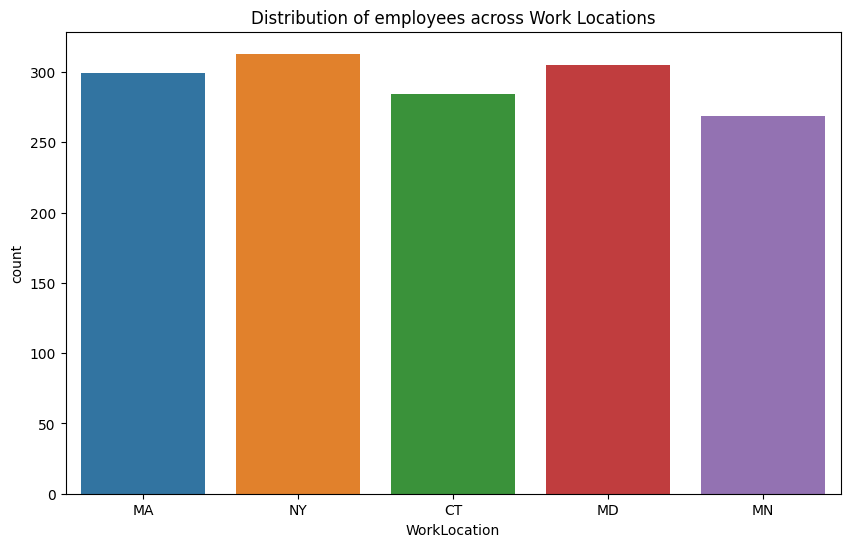

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(x='WorkLocation', data=df)
plt.title('Distribution of employees across Work Locations')
plt.show()

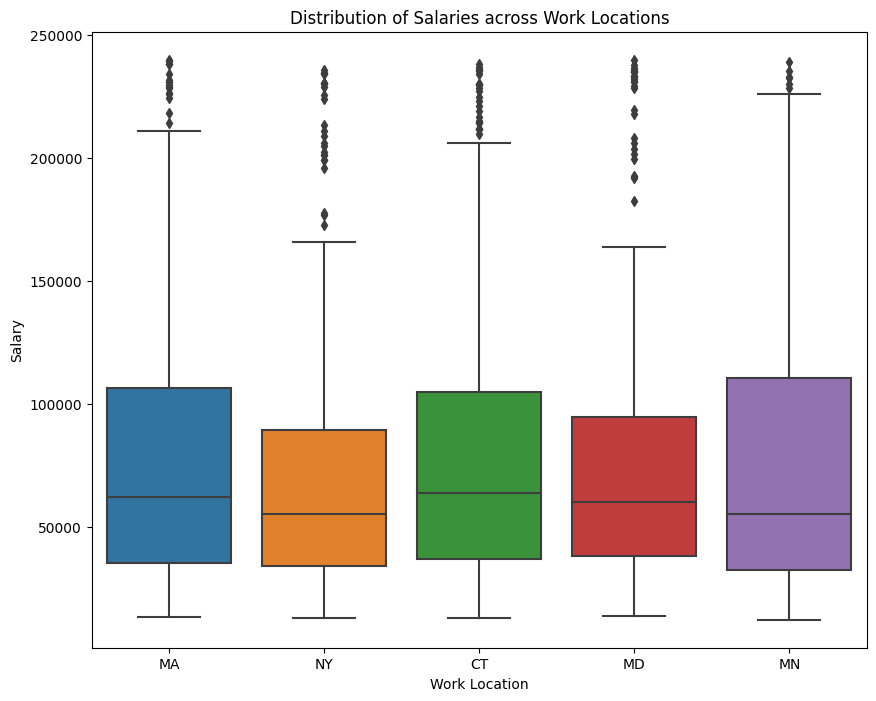

In [28]:
plt.figure(figsize = (10,8))
sns.boxplot(x='WorkLocation', y='Salary', data=df)
plt.title('Distribution of Salaries across Work Locations')
plt.xlabel('Work Location')
plt.ylabel('Salary')
plt.show()

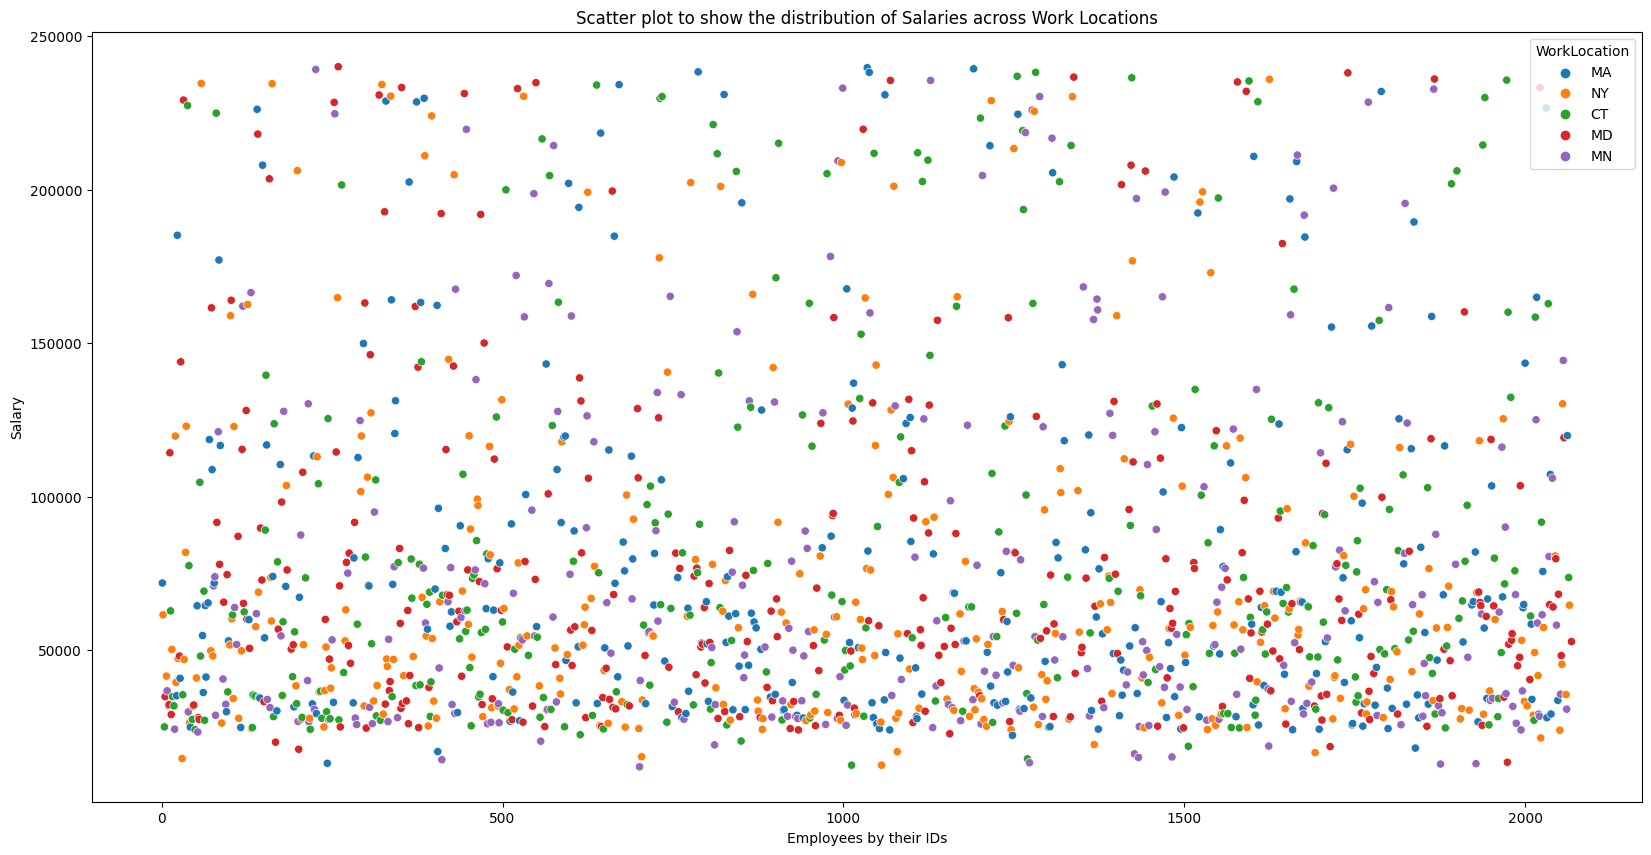

In [29]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='EmployeeNumber', y='Salary', hue='WorkLocation', data=df)
plt.title('Scatter plot to show the distribution of Salaries across Work Locations')
plt.xlabel('Employees by their IDs')
plt.ylabel('Salary')
plt.show()

In [30]:
X = df[['JobRole', 'WorkLocation']]
y = df['Salary']

# X_numeric = pd.get_dummies(X)

encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

/Users/brandonchu/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
import pickle
pickle.dump((model,encoder), open('./server/DirectoryWithEncoder.pkl', 'wb'))

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8106488554148847


In [34]:
import math
states = df['WorkLocation'].unique().tolist()
roles = df['JobRole'].unique().tolist()
flag = True

state = input('Enter the work location you want to work at: ')
while(flag):
    if state not in states:
        state = input('Enter the work location you want to work at: ')
    else:
        flag = False

flag=True
role= input('Enter the job role you are looking for: ')
while(flag):
    if role not in roles:
        role = input('Enter the job role you are looking for: ')
    else:
        flag = False

user_input = [{'JobRole': role, 'WorkLocation':state}]
new_search = pd.DataFrame(user_input)

encode_search = pd.DataFrame(encoder.transform(new_search), columns = encoder.get_feature_names_out(['JobRole','WorkLocation']))

prediction = model.predict(encode_search)

print("\n")
print(f"Predicted salary for {role} in {state} is ", math.floor(prediction[0]))



Predicted salary for HR in NY is  106945


/Users/brandonchu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


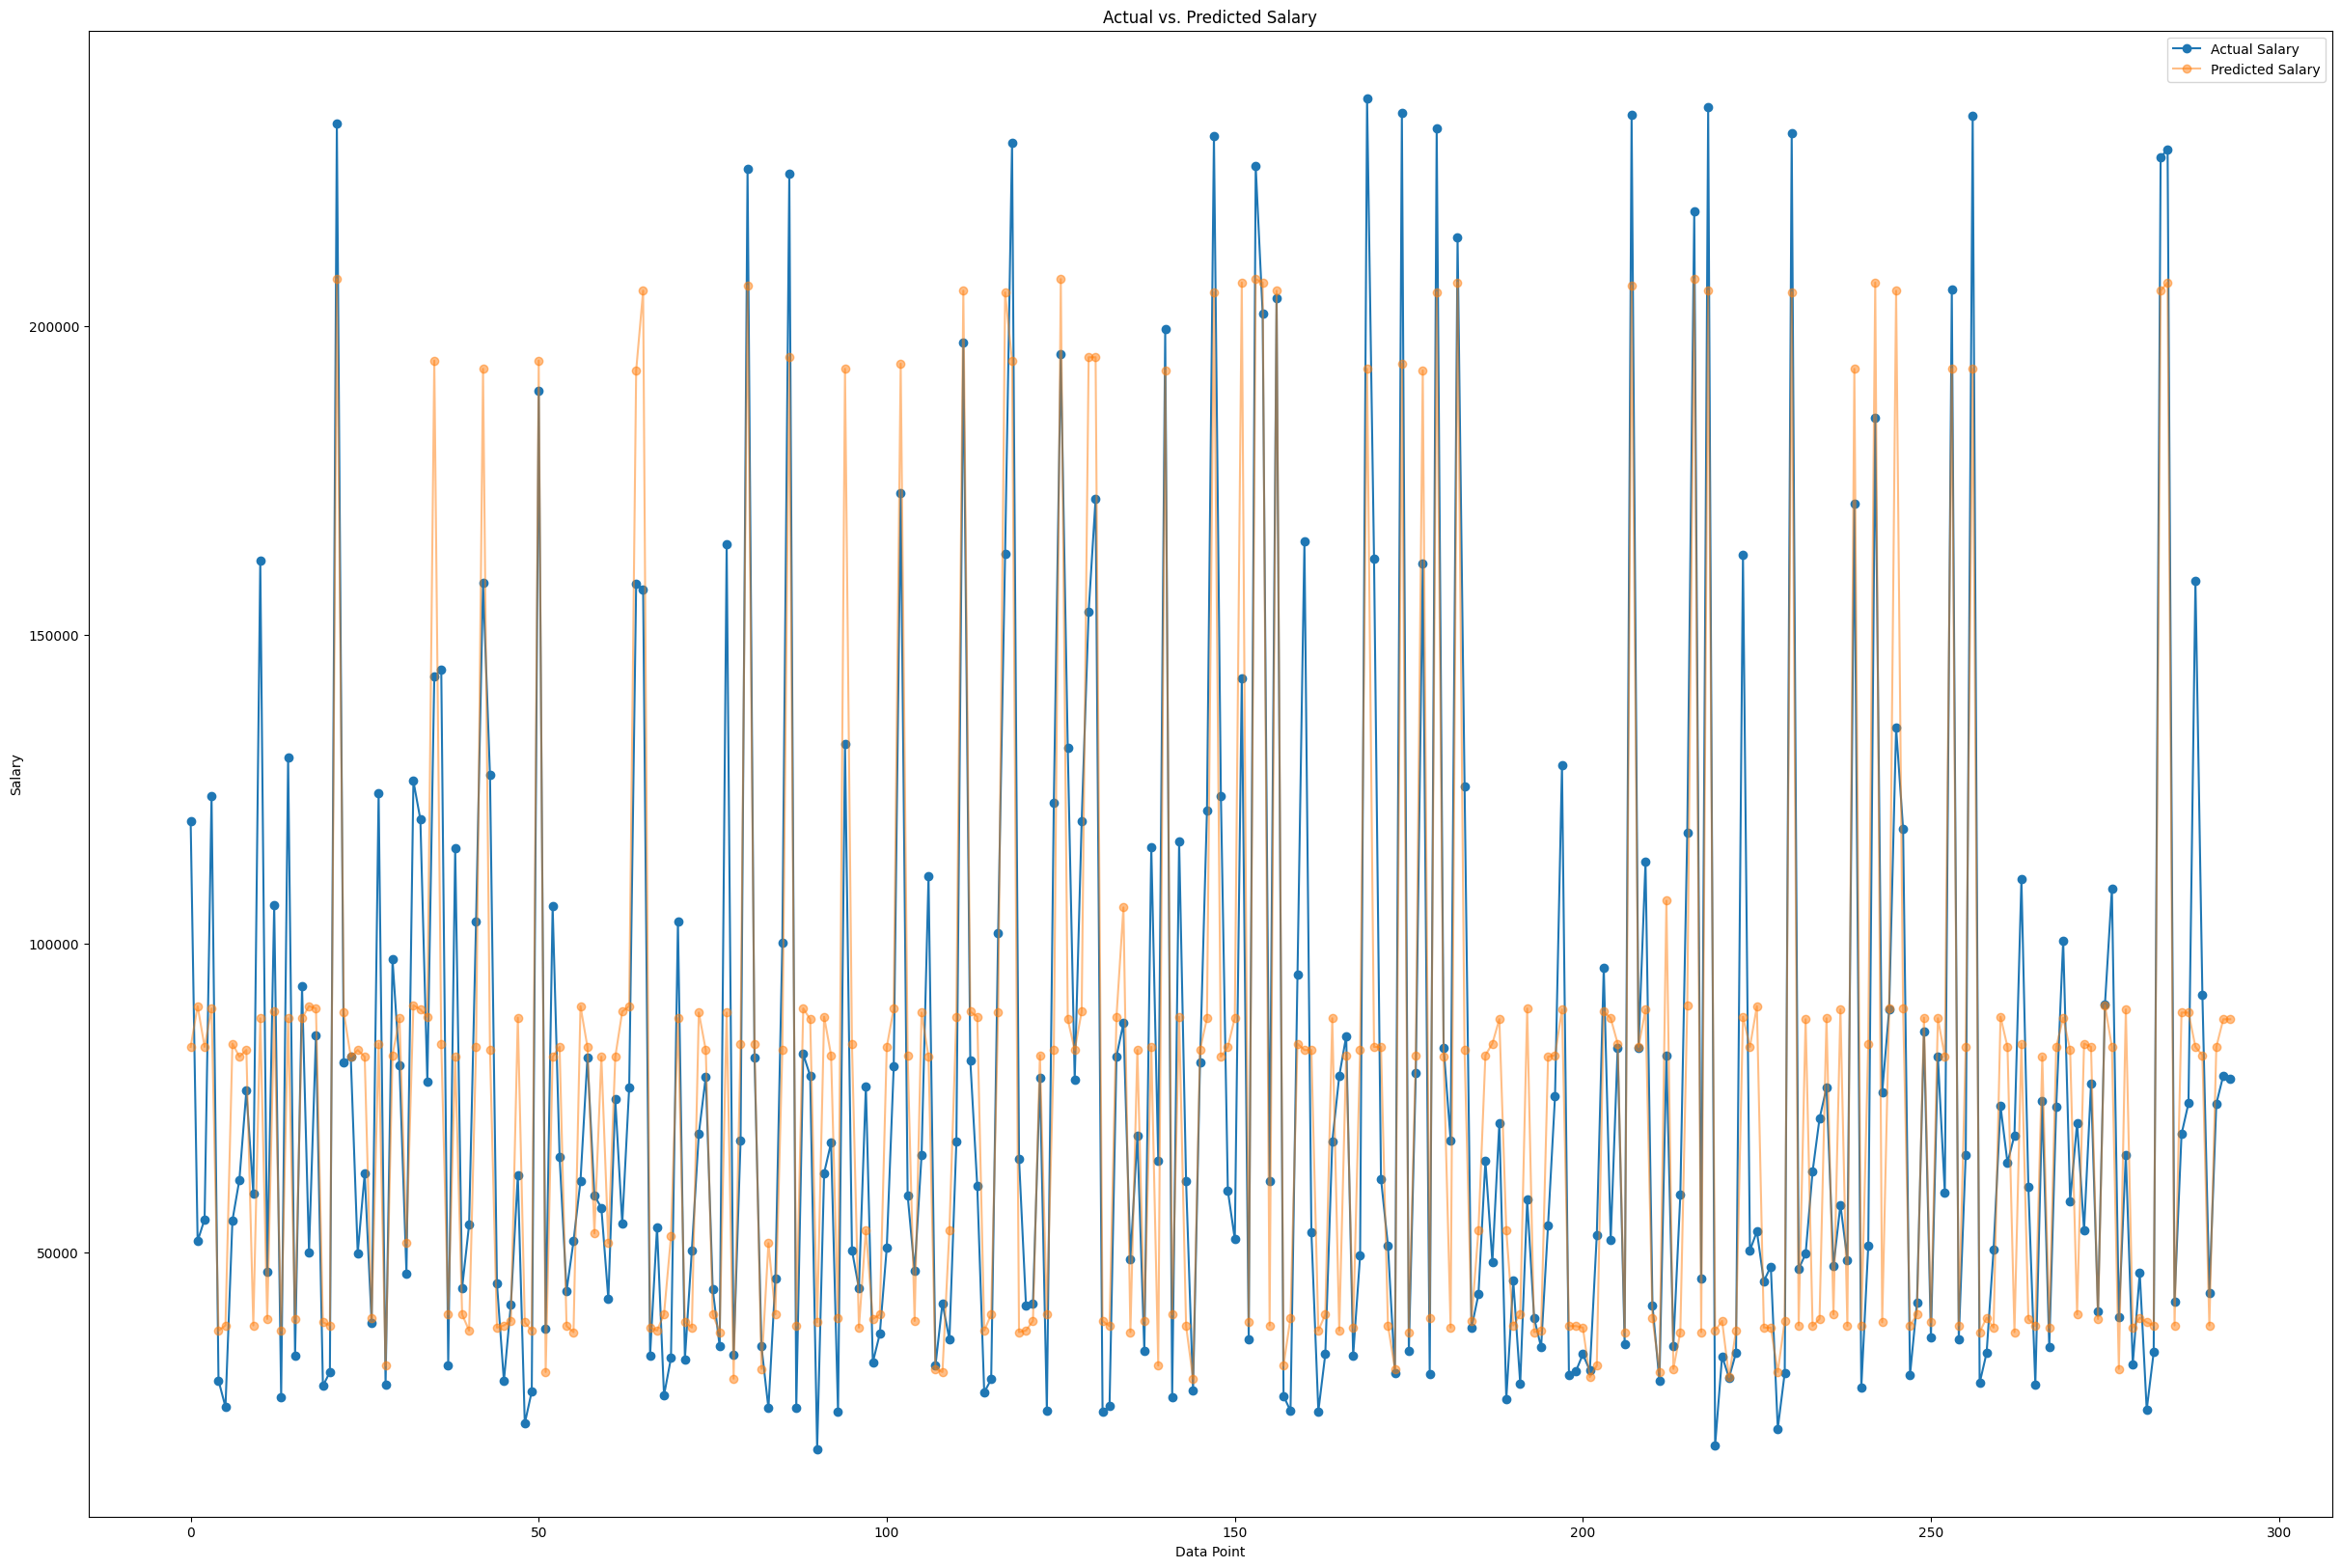

In [35]:
plt.figure(figsize=(30, 20))
plt.plot(range(len(y_test)), y_test, marker = 'o', label = 'Actual Salary')
plt.plot(range(len(y_test)), y_pred, marker = 'o', label = 'Predicted Salary', color='tab:orange', alpha=0.5)
plt.xlabel('Data Point')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()